## Module 1 : Simulating Neutral Atom Qubits with QuTip
Here, we only consider the time-independent model, that is, all the coefficients are independent of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myPkg.atom_basis import *
from myPkg.hamiltonian_builder import construct_TD_SAHam
from qutip import mesolve

### Single Atom Exercises
There are four Exerciese.

The values of parameters in Collapse operators : $ b_{0r}, b_{1r}, b_{dr} $ and $ \gamma_r $ are fixed, whereas the values of parameters in Hamiltonian can vary. And the initial state can choose different states.


In [2]:
# Time grid (microseconds in your notebook)
tlist = np.linspace(0, 50, 400)

In [3]:
# Lindblad parameters
lindblad_params = dict(
  gamma_r = 0.2, 
  b_0r = 1/16, 
  b_1r = 1/16, 
  b_dr = 7/8
)

param_sets = [
    dict(Omega_01=0.5, delta_1=0.0, Omega_r=0.0,  Delta_r=0.0),
    dict(Omega_01=0.0, delta_1=0.0, Omega_r=0.0,  Delta_r=0.0),
    dict(Omega_01=0.0, delta_1=0.0, Omega_r=10.0, Delta_r=0.0),
    dict(Omega_01=1.0, delta_1=1.0, Omega_r=0.0,  Delta_r=0.0),
]

state0, state1, stater, stated = make_fock_basis_states(num_qubits=1, dim_atom=4)
init_state_list = [state0 * state0.dag(), stater * stater.dag(), state1 * state1.dag(), state0 * state0.dag()]

# list of wanted operators
expect_list = [
  state0 * state0.dag(),
  state1 * state1.dag(),
  stated * stated.dag(),
  stater * stater.dag(),
]

#### Simulations

In [4]:
res_list = []
for psi0, params in zip(init_state_list, param_sets):
    atom0_ham_params = params
    
    H0, collapse_list = construct_TD_SAHam(ham_params=atom0_ham_params, lindblad_params=lindblad_params)

    # simulate the dynamics
    result = mesolve(H=H0, rho0=psi0, tlist=tlist, c_ops=collapse_list, e_ops=expect_list, 
                    options={"store_final_state": 1, "store_states": 0})
    
    res_list.append(result)

In [5]:
def make_sub_title(p: dict) -> str:
    return (rf"$\Omega_{{01}}={p['Omega_01']}$, "
            rf"$\delta_1={p['delta_1']}$, "
            rf"$\Omega_r={p['Omega_r']}$, "
            rf"$\Delta_r={p['Delta_r']}$, "
            )

def make_top_title(p: dict) -> str:
    return (rf"$\gamma_r = {p['gamma_r']}$, "
            rf"$b_{{0r}} = {p['b_0r']}$, "
            rf"$b_{{1r}} = {p['b_1r']}$, "
            rf"$b_{{dr}} = {p['b_dr']}$"
            )

In [6]:
# Global plotting defaults (feel free to tweak)
plt.rcParams.update({
    'figure.dpi': 200,
    'savefig.dpi': 300,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'legend.fontsize': 9,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 2.0,
    "font.size": 10,
})
plt.style.use('seaborn-v0_8-whitegrid')


#### Plot the time evolution of population of computational basis, i.e., $|0\rangle$ and $|1\rangle$

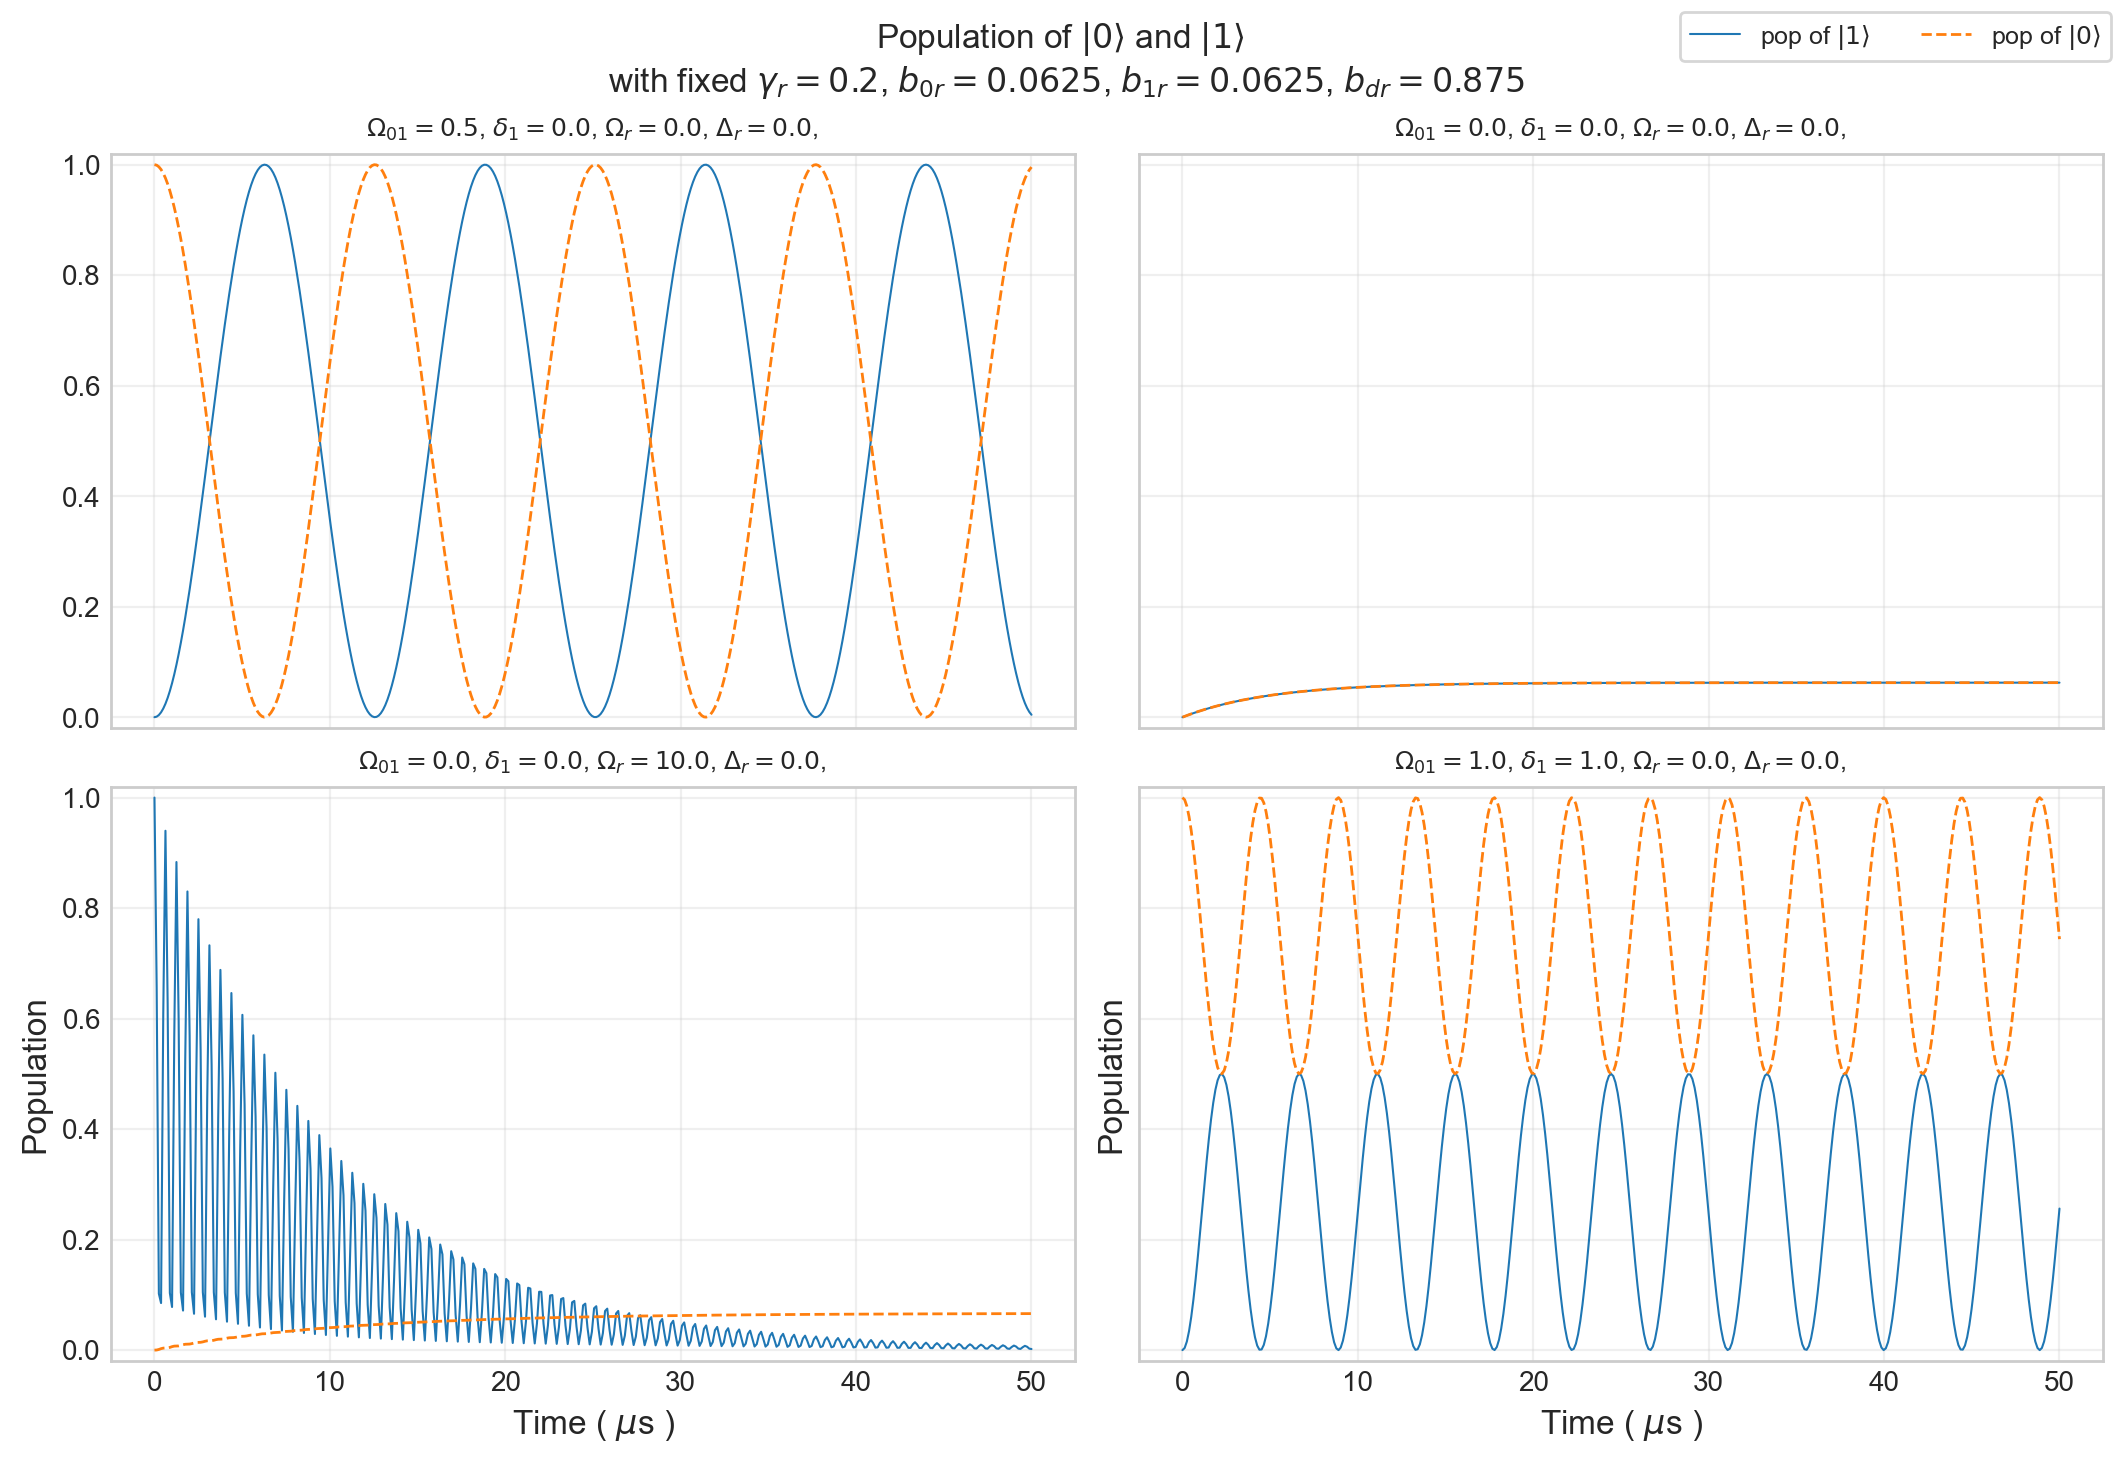

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.2), sharex=True, sharey=True, constrained_layout=True)
axes = axes.ravel()
fig_index = 1   # 1: plot both |0> and |1>  2 : plot only |r>   3 : plot only |d>

top_title = make_top_title(p = lindblad_params)
for idx, (ax, res) in enumerate(zip(axes, res_list)):
    sub_title = make_sub_title(p = param_sets[idx])
    ax.plot(tlist, res.expect[1], label = r"pop of $|1\rangle$", linewidth=0.75)
    ax.plot(tlist, res.expect[0], label = r"pop of $|0\rangle$", linestyle='--', linewidth=1)
    ax.set_title(sub_title, fontsize=9)
    ax.grid(True, alpha=0.3)

# axis labels only on outer edges (cleaner)
for ax in axes[2:]:
    ax.set_xlabel(r"Time ( $\mu$s )")
    ax.set_ylabel("Population")
    ax.set_ylim(-0.02, 1.02)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
fig.suptitle(r"Population of $|0\rangle$ and $|1\rangle$ " + "\n with fixed " + top_title)
plt.show()

#### Plot the time evolution of population of $|r\rangle$ and $|d\rangle$

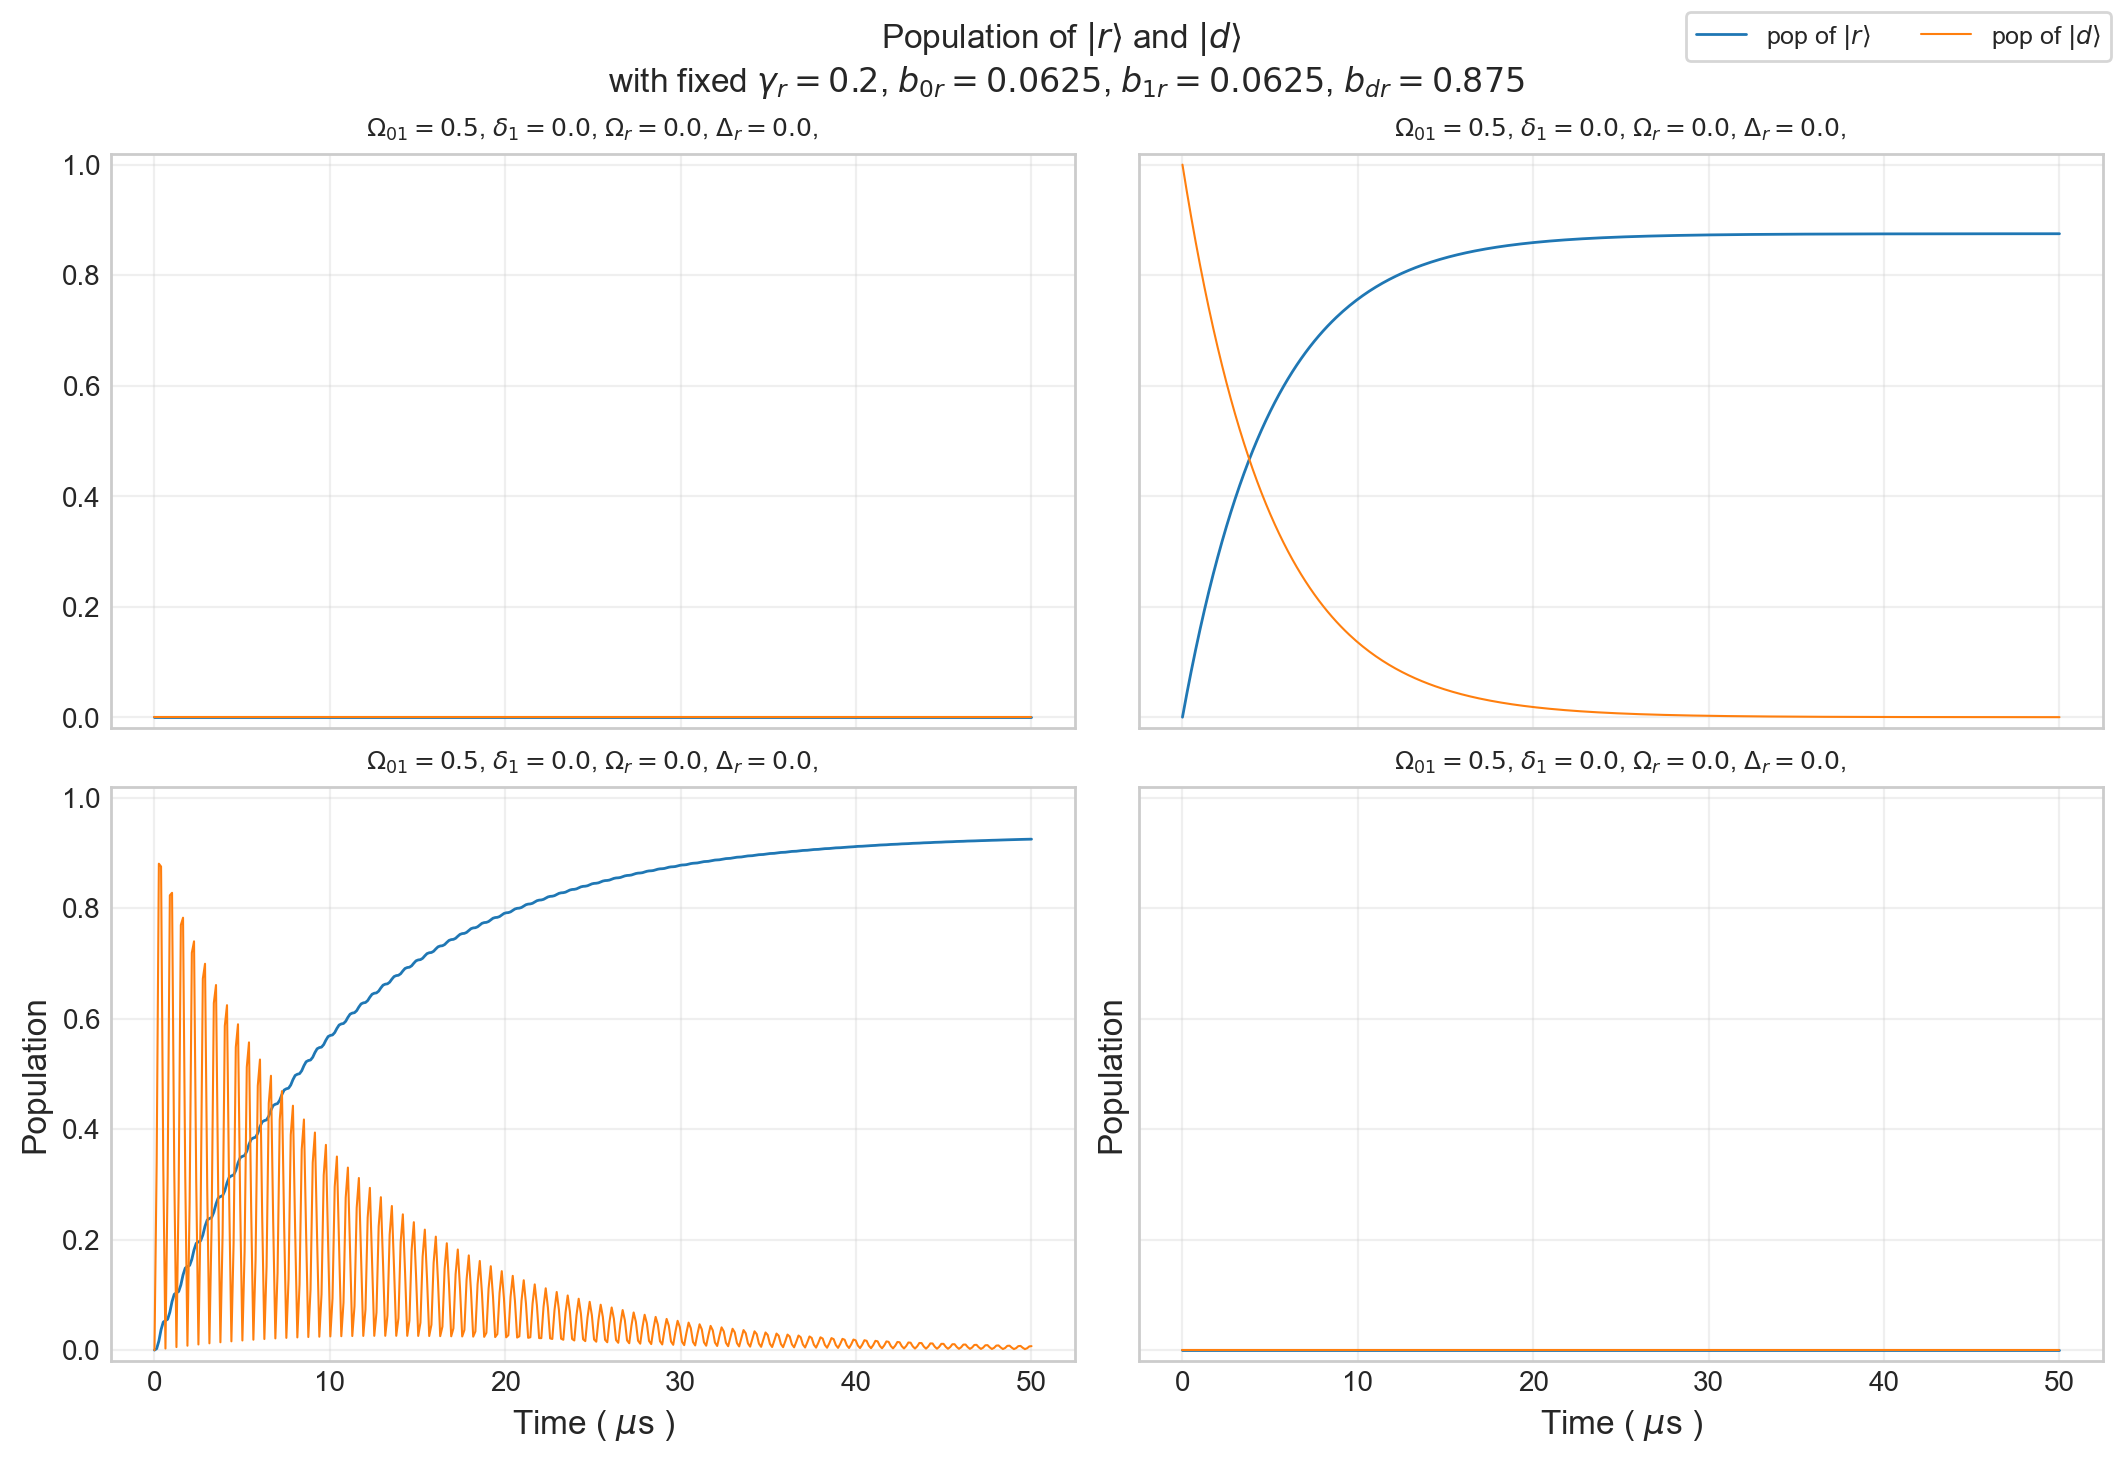

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.2), sharex=True, sharey=True, constrained_layout=True)
axes = axes.ravel()
fig_index = 2   # 1: plot both |0> and |1>  2 : plot only |r>   3 : plot only |d>

top_title = make_top_title(p = lindblad_params)
for ax, res in zip(axes, res_list):
    sub_title = make_sub_title(p = param_sets[0])
    ax.plot(tlist, res.expect[2], label = r"pop of $|r\rangle$", linewidth=1)
    ax.plot(tlist, res.expect[3], label = r"pop of $|d\rangle$", linewidth=0.75)
    ax.set_title(sub_title, fontsize=9)
    ax.grid(True, alpha=0.3)

# axis labels only on outer edges (cleaner)
for ax in axes[2:]:
    ax.set_xlabel(r"Time ( $\mu$s )")
    ax.set_ylabel("Population")
    ax.set_ylim(-0.02, 1.02)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
fig.suptitle(r"Population of $|r\rangle$ and $|d\rangle$" + "\n with fixed " + top_title)
plt.show()

#### Use another $\gamma_r = \frac{1}{540}$

In [22]:
# Time grid (microseconds in your notebook)
tlist = np.linspace(0, 50, 400)

# Lindblad parameters
lindblad_params = dict(
  gamma_r = 1/540, 
  b_0r = 1/16, 
  b_1r = 1/16, 
  b_dr = 7/8
)

param_sets = [
    dict(Omega_01=0.5, delta_1=0.0, Omega_r=0.0,  Delta_r=0.0),
    dict(Omega_01=0.0, delta_1=0.0, Omega_r=0.0,  Delta_r=0.0),
    dict(Omega_01=0.0, delta_1=0.0, Omega_r=10.0, Delta_r=0.0),
    dict(Omega_01=1.0, delta_1=1.0, Omega_r=0.0,  Delta_r=0.0),
]

state0, state1, stater, stated = make_fock_basis_states(num_qubits=1, dim_atom=4)
init_state_list = [state0 * state0.dag(), stater * stater.dag(), state1 * state1.dag(), state0 * state0.dag()]

# list of wanted operators
expect_list = [
  state0 * state0.dag(),
  state1 * state1.dag(),
  stater * stater.dag(),
  stated * stated.dag(),
]

res_list = []
for psi0, params in zip(init_state_list, param_sets):
    atom0_ham_params = params
    
    H0, collapse_list = construct_TD_SAHam(ham_params=atom0_ham_params, lindblad_params=lindblad_params)

    # simulate the dynamics
    result = mesolve(H=H0, rho0=psi0, tlist=tlist, c_ops=collapse_list, e_ops=expect_list, 
                    options={"store_final_state": 1, "store_states": 0})
    
    res_list.append(result)

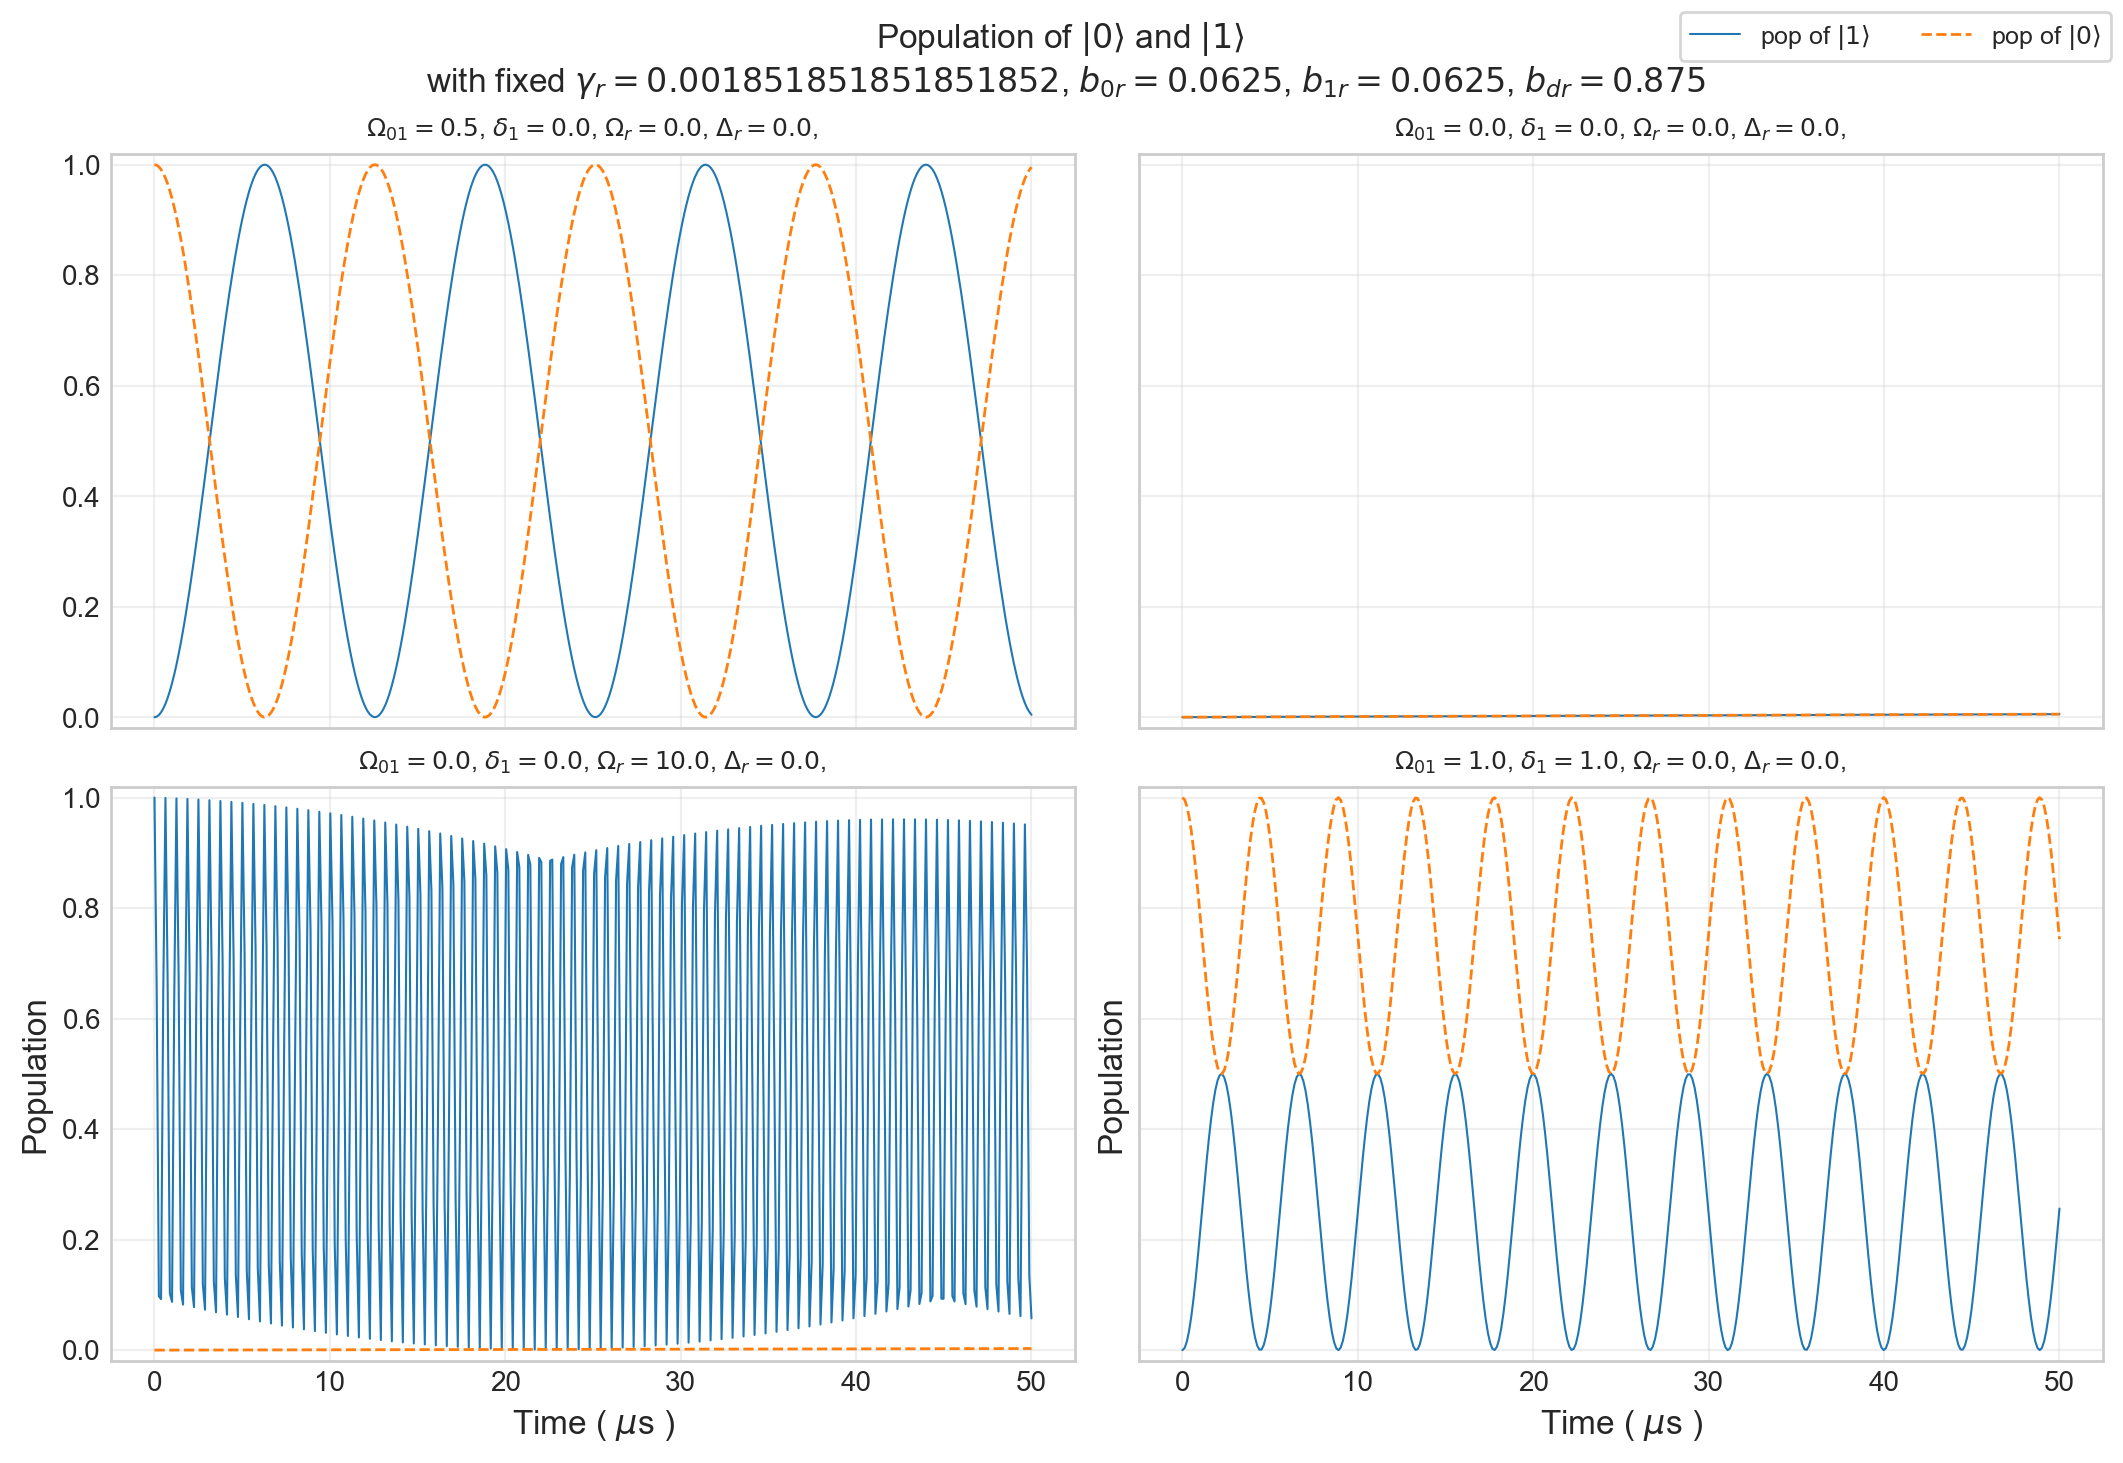

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.2), sharex=True, sharey=True, constrained_layout=True)
axes = axes.ravel()
fig_index = 1   # 1: plot both |0> and |1>  2 : plot only |r>   3 : plot only |d>

top_title = make_top_title(p = lindblad_params)
for idx, (ax, res) in enumerate(zip(axes, res_list)):
    sub_title = make_sub_title(p = param_sets[idx])
    ax.plot(tlist, res.expect[1], label = r"pop of $|1\rangle$", linewidth=0.75)
    ax.plot(tlist, res.expect[0], label = r"pop of $|0\rangle$", linestyle='--', linewidth=1)
    ax.set_title(sub_title, fontsize=9)
    ax.grid(True, alpha=0.3)

# axis labels only on outer edges (cleaner)
for ax in axes[2:]:
    ax.set_xlabel(r"Time ( $\mu$s )")
    ax.set_ylabel("Population")
    ax.set_ylim(-0.02, 1.02)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
fig.suptitle(r"Population of $|0\rangle$ and $|1\rangle$ " + "\n with fixed " + top_title)
plt.show()

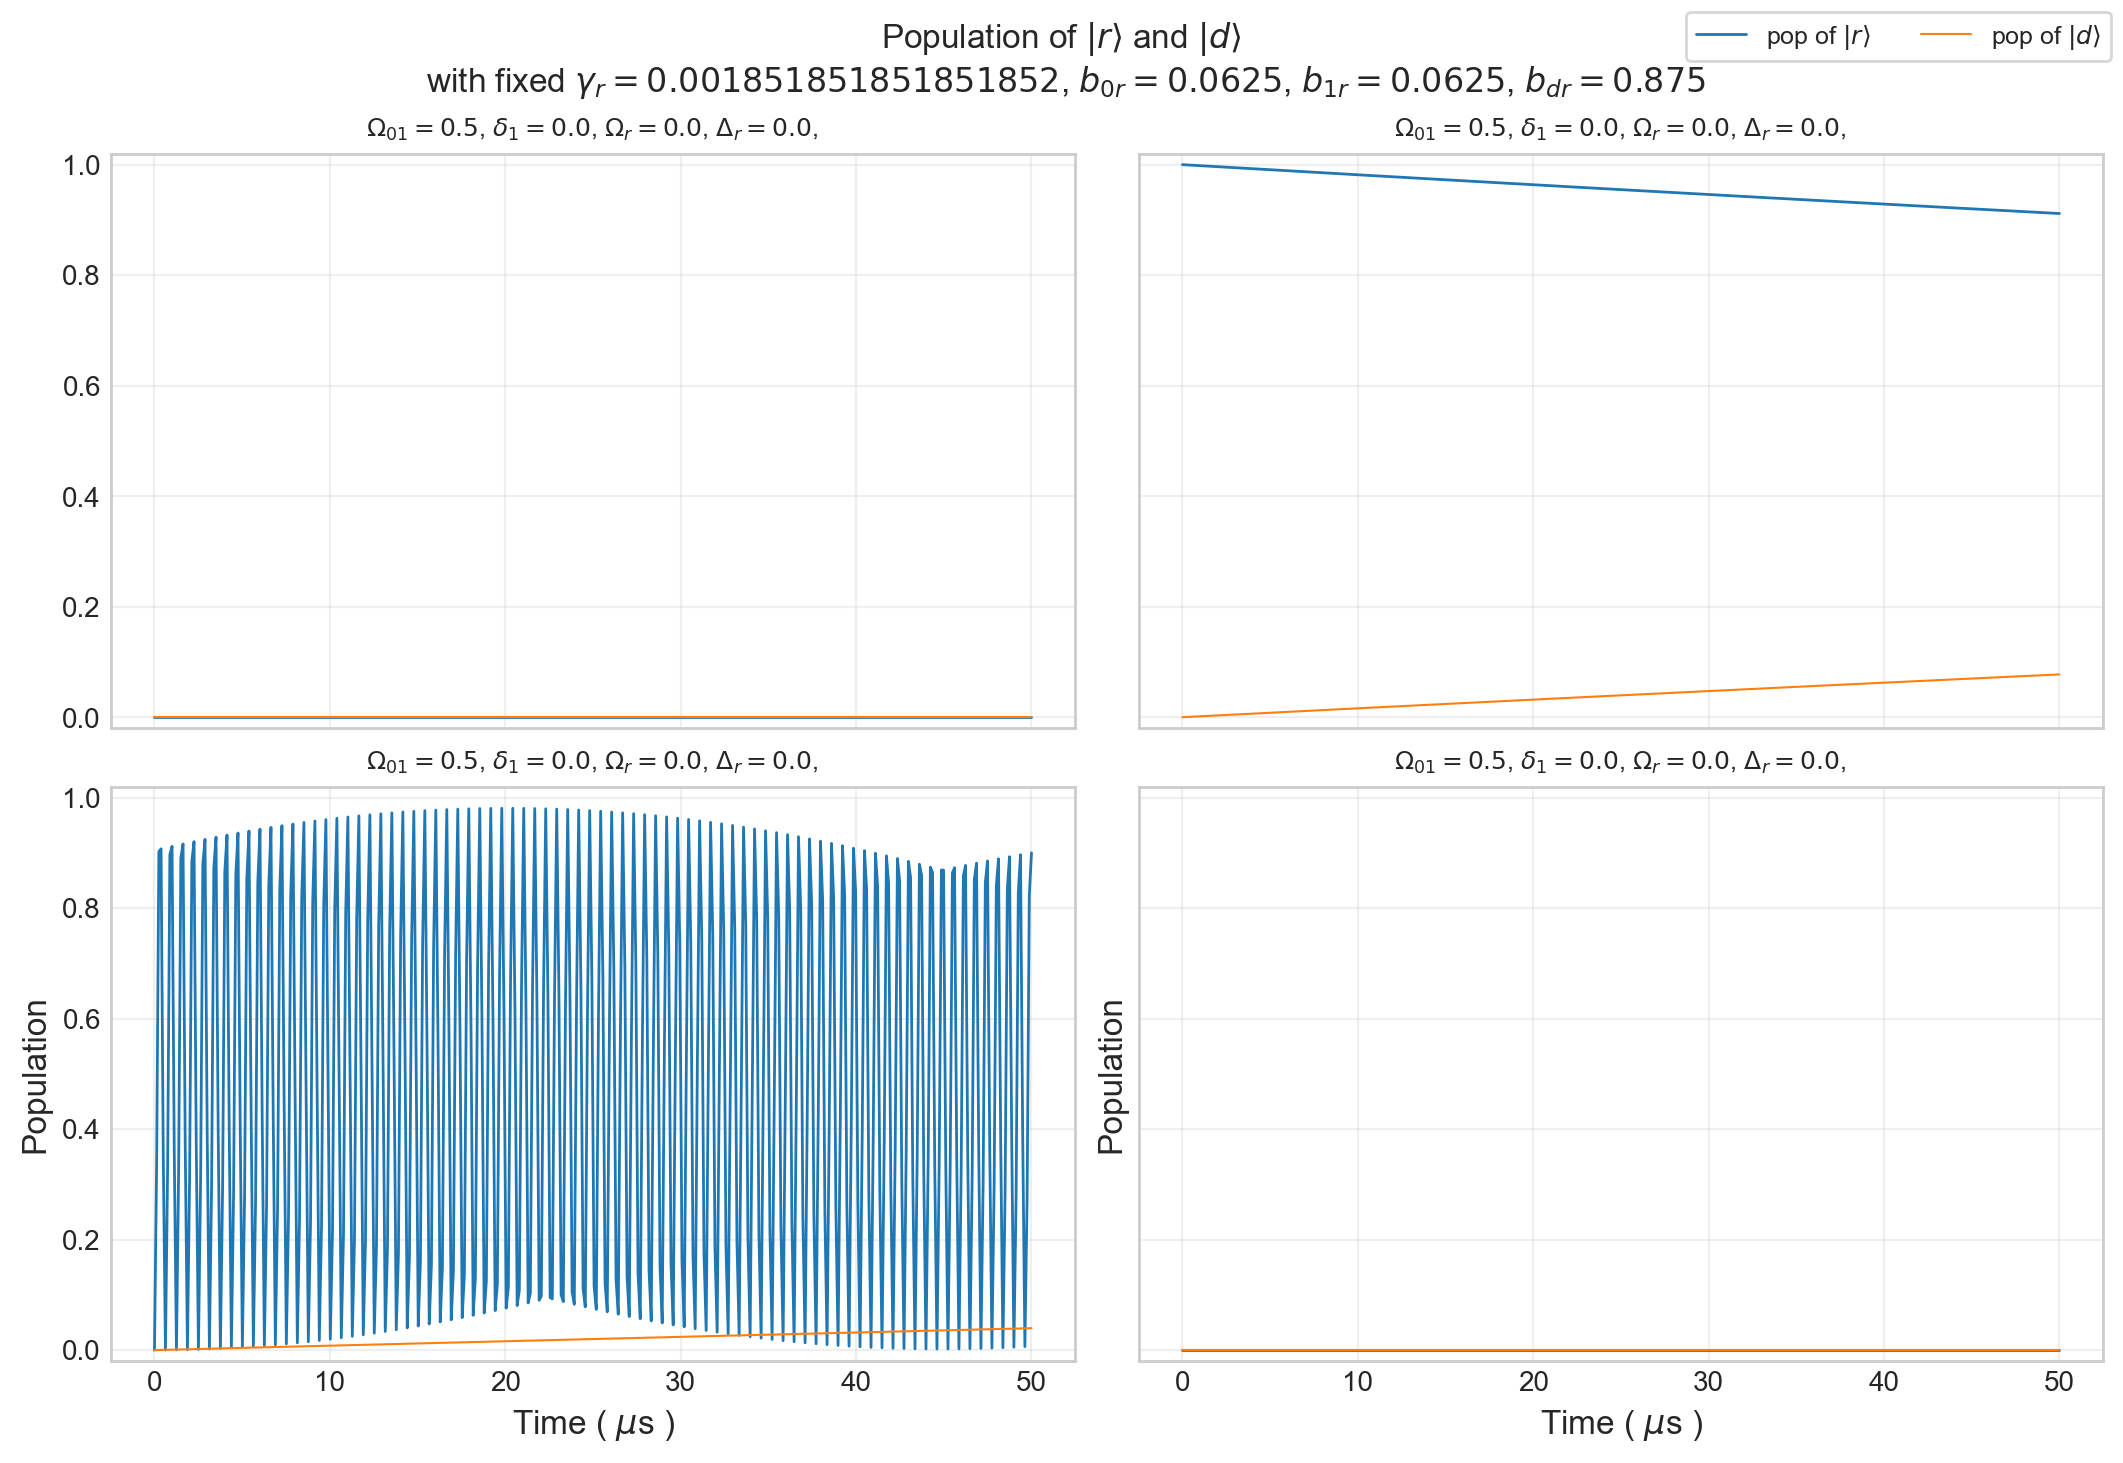

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10.5, 7.2), sharex=True, sharey=True, constrained_layout=True)
axes = axes.ravel()
fig_index = 2   # 1: plot both |0> and |1>  2 : plot only |r>   3 : plot only |d>

top_title = make_top_title(p = lindblad_params)
for ax, res in zip(axes, res_list):
    sub_title = make_sub_title(p = param_sets[0])
    ax.plot(tlist, res.expect[2], label = r"pop of $|r\rangle$", linewidth=1)
    ax.plot(tlist, res.expect[3], label = r"pop of $|d\rangle$", linewidth=0.75)
    ax.set_title(sub_title, fontsize=9)
    ax.grid(True, alpha=0.3)

# axis labels only on outer edges (cleaner)
for ax in axes[2:]:
    ax.set_xlabel(r"Time ( $\mu$s )")
    ax.set_ylabel("Population")
    ax.set_ylim(-0.02, 1.02)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
fig.suptitle(r"Population of $|r\rangle$ and $|d\rangle$" + "\n with fixed " + top_title)
plt.show()